# Simpson's Method and Monte Carlo Integration

## Library Imports Go Here

In [1]:
import math
import numpy as np
import time
import matplotlib.pyplot as plt
import random

## Simpson's Method

### The Basic Function

<font color = blue>
Write a function that implements Simpson's method.  It should take as inputs the function F, limits of integration $x_0$ and $x_f$, and the number of regions $N$.  

Since in this case $N$ must be an even integer, in the event that the user imputs a value that is not an even integer have the function print a warning message, but then approximate $N$ as the nearest even integer to the one provided, and then proceed with the calculation.

In [2]:
def letsGetBoxy(funct,limits,N):
    #set the change of x
    dX = ( limits[1]-limits[0] ) / N
    #make an array of x values and y values, then return the sum of (Xf-Xo)*delta x
    xVals = np.array([ limits[0]+(dX*i) for i in range(N)])
    yVals = np.array([funct(x) for x in xVals])
    return sum( np.array( [dX*(yVals[n]) for n in range(N)] ) )


#integrate vie trapizoids, equivalent to the square integration with a correction factor.
def inatelyTrapazoidal(funct,limits,N):
    dX = ( limits[1]-limits[0] ) / N
    return letsGetBoxy(funct,limits,N) + 0.5*dX*( funct(limits[1])-funct(limits[0]) )


#the only one in the show I can imagine using this. Simpson method.
def lizaSimpson(funct,startstop,N):
        #correcting if N is odd, though it doesn't chech for much else in terms of errors.
        if N % 2 == 1:
            N += 1
        deltaX=float((startstop[1]-startstop[0])/N)
        
        #adds each pair of intervals to the answer
        ans = 0.0
        for i in range(int(N/2)):
            fNotOfJ = funct( 2*i*deltaX + startstop[0] )
            fOneofJ = funct( (2*i+1)*deltaX + startstop[0] )
            fTwoofJ = funct( (2*i+2)*deltaX + startstop[0] )
            ans += fNotOfJ + 4*fOneofJ + fTwoofJ
        return (deltaX/3.0)*ans



Now that I have written this new method of integration, I feel like I could write the others to run faster, cause I jumped to creating arrays- I'll check it out.

### Testing

<font color = blue>
Test your code on the same function

$$
f(x) = \frac{x^2}{2}
$$

that you previously used for the box and trapezoidal integrals.  Note that since this is quadratic, the Simpson method should give the exact correct answer.

In [3]:
def xSquaredOverTwo(x):
    return (x**2)/2
    
#testing compared to the box function, using the minimum posisble intervals for the simpson method
print(letsGetBoxy(xSquaredOverTwo,(-1,3),100),inatelyTrapazoidal(xSquaredOverTwo,(-1,3),100), lizaSimpson(xSquaredOverTwo,(-1,3),1))

4.587200000000002 4.667200000000002 4.666666666666666


the difference in error between them is pretty neat. The correction factgor moving from the square method to the trapidoid method is neat, getting it a lot closer, but the simpson method is by far the most accurate, as this is a parabolic function and it measures with parabolas. I used one region for it, and it produced the correct value. 

## Comparing Accuracy

<font color = blue>
You now have three separate pieces of code for implementing approximations to an integral, each with greater accuracy than the last.  This is a good opportunity to quantitatively compare the methods.  We will use the integral

$$
\int_{0}^{1} x^5 \, dx
$$

to examine the accuracy.  For each method, the number $N$ (the number of subdivisions we split the integration region into) controls how accurate the method is.  Specifically, we have the width of each region $\Delta x \propto \frac{1}{N}$, and we expect the amount of error to decrease, the smaller $\Delta x$ is.

In [4]:
def eksCinqtupled(x):
    return x**5

print(letsGetBoxy(eksCinqtupled,(0,1),100),inatelyTrapazoidal(eksCinqtupled,(0,1),100), lizaSimpson(eksCinqtupled,(0,1),100))

0.16170833250000005 0.16670833250000006 0.16666667000000002


Still neat to see the error difference with only 100 regions- impressice that they're correct to 2, 3, and then 7 decimal places respctively. Thats quite a jump.

### Analytic Calculation

<font color = blue>
Begin by working out the integral analytically, showing your work.

 $$\large{\int_0^1 x^5 dx =  \frac{x^6}{6} \Bigg|_0^1  = \Bigg[\frac{1^6}{6}\Bigg] - \Bigg[\frac{0^6}{6}\Bigg] =  \frac{1}{6}  = 0.166666}$$

### Box Integration Accuracy

<font color = blue>
For the box integration method, we expect the amount of error to be proportional to $\Delta x$, and thus to $\frac{1}{N}$.

Compute a table of the results of the box integral for values of $N$ between 100 and 1000 in steps of 10.  

Plot these results and confirm the essential behavior is correct.

Then, use the command curve_fit from the library "scipy.optimize" to fit this data to a function of the form
$$
C + \frac{A}{N}
$$
where $C$ is the analytic result of the integral.  Display this fitted curve together with the data on a single plot.

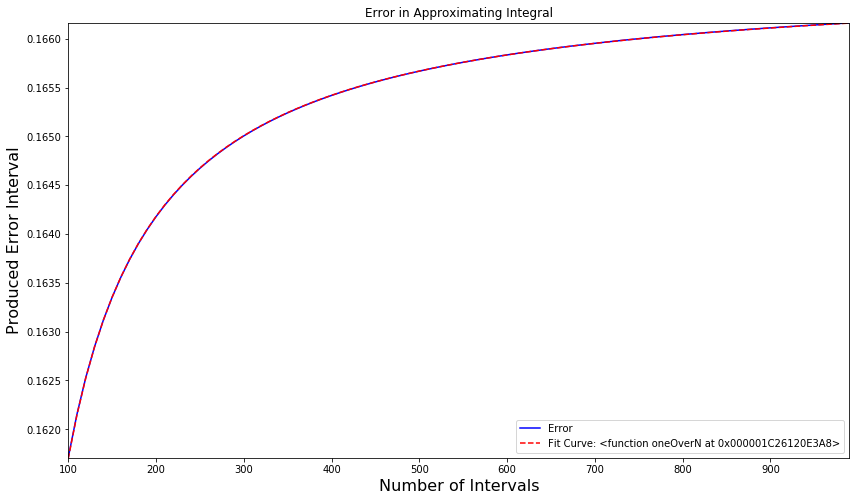

In [5]:
from scipy.optimize import curve_fit as fit

#1/n fit function
def oneOverN(N,C,A):
    return C + (A/N)

def errorPlot(funcTest,xrange,integrationMethod,fitFunkt):
    #set up arrays
    nValues=np.array(range(100,1000,10))
    errorComparison=np.array([])
     
    #integrate the input function over the input interval using the supplied
    #method to show the difference in result
    for n in nValues:
        errorComparison=np.append(errorComparison,integrationMethod(funcTest,xrange,n))
    errorComparison = abs(errorComparison)
    
    #setting the domain to the found values.
    yRange=( min(errorComparison),max(errorComparison) )
    
    #Format and plot data
    fig, ax = plt.subplots(1,1,figsize=(14, 8))
    axis_font = {'size':16}
    param_dict1={'color' : 'blue', 'linestyle' : 'solid', 'label' : 'Error'}
    param_dict2={'color' : 'red', 'linestyle' : '--', 'label' : 'Fit Curve: {}'.format(fitFunkt)}
    ax.plot(nValues,errorComparison,**param_dict1)
    
    #fit the curve
    popt, pcov = fit(fitFunkt,nValues,errorComparison)
    ax.plot(nValues,fitFunkt(nValues,*popt),**param_dict2)
    
    
    #label lines and Title
    ax.set_xlabel("Number of Intervals",**axis_font)
    ax.set_ylabel("Produced Error Interval",**axis_font)
    ax.legend(["Error",'Fit Curve: {}'.format(str(fitFunkt))],loc='lower right')
    plt.title("Error in Approximating Integral",fontdict=None,loc='center')
    
    #set limits and show axi lines, default at x=0 and y=0
    plt.xlim(nValues[0], nValues[-1])
    plt.ylim(yRange[0], yRange[-1])
    
    plt.vlines(0,xrange[0], xrange[1], colors='k', linestyles='solid')
    plt.hlines(0,yRange[0], yRange[1], colors='k', linestyles='solid')
    
    plt.show()
    
    

#compared error for a given function, so for example I can mess around and see how well a 
#trapazoid approximates the intrgral of a linear function compared to the simpson's method
errorPlot(eksCinqtupled,(0,1),letsGetBoxy,oneOverN)

            

### Trapezoid Integration Accuracy

<font color = blue>
Repeat the above procedure, but this time using the Trapezoid integration method, where the error should decrease as $\frac{1}{N^2}$.

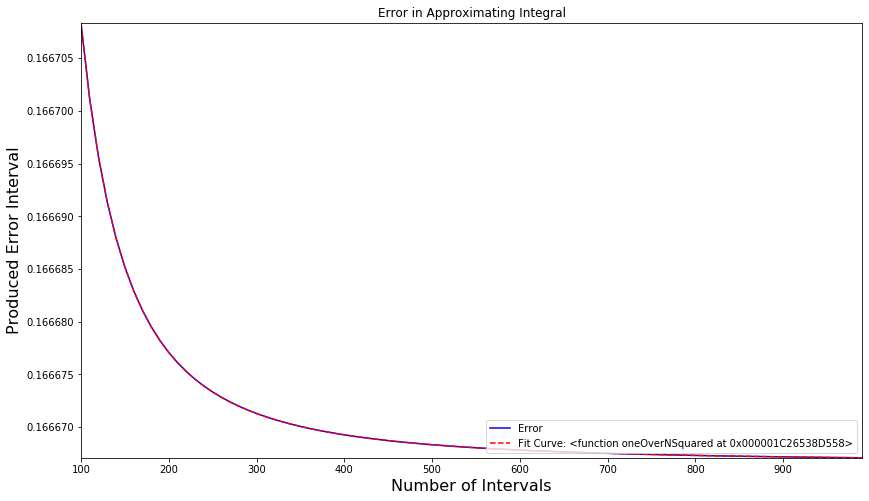

In [6]:
#1/n^2 fit function, as the name implies
def oneOverNSquared(n,a,c):
    return c + a/(n**2)

#I made everything invisible, bad for debugging but good for plug and play.
errorPlot(eksCinqtupled,(0,1),inatelyTrapazoidal,oneOverNSquared)

The trapezoidal function overestimates the integral- probably because it's convex at this point?

### Simpson's Rule Accuracy

<font color = blue>
Finally, repeat the exercise one more time, with Simpson's rule, which we expect to have errors that scale as $\frac{1}{N^4}$.

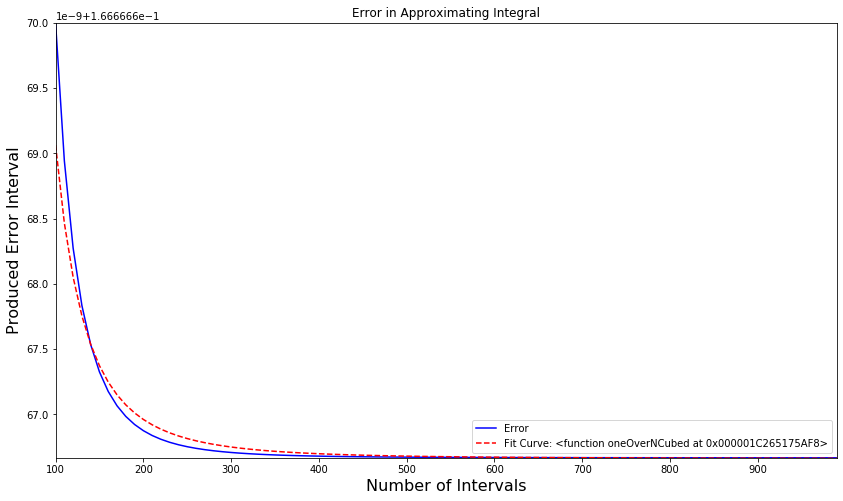

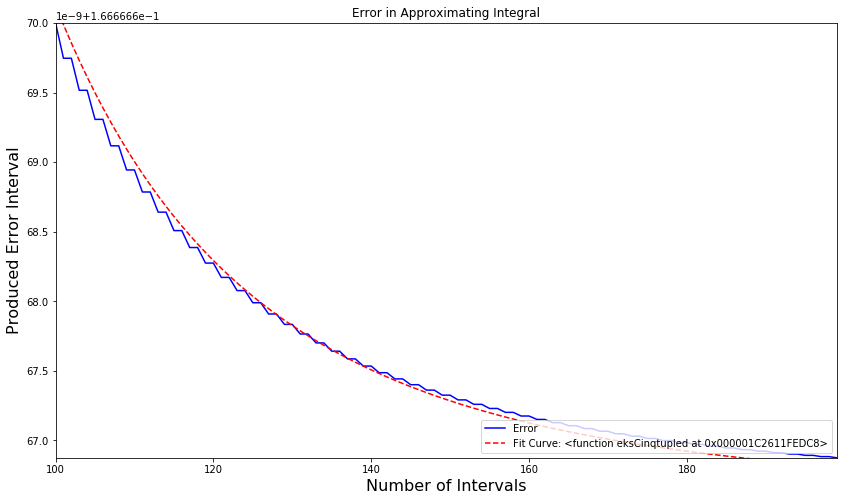

In [7]:
#fit function of the same form for 1/n^3, just to see that it doesn't fit correctly.
def oneOverNCubed(n,a,c):
    return c + a/(n**3)

errorPlot(eksCinqtupled,(0,1),lizaSimpson,oneOverNCubed)

#last fit function
def oneOverNQuarted(n,a,c):
    return c + a/(n**4)


#Isolating the strange data:

xrange=(0,1)
nValues=np.array(range(100,200))
errorComparison=np.array([])

#integrate the supplied function over the interval using the supplied method to show the difference in result
for n in nValues:
    errorComparison=np.append(errorComparison,lizaSimpson(eksCinqtupled,xrange,n))
errorComparison = abs(errorComparison)# - errorComparison[-1])

#setting the domain to a lil above and a lil below the found values.
yRange=( min(errorComparison),max(errorComparison) )

#Formatn and plot data
fig, ax = plt.subplots(1,1,figsize=(14, 8))
axis_font = {'size':16}
param_dict1={'color' : 'blue', 'linestyle' : 'solid', 'label' : 'Error'}
param_dict2={'color' : 'red', 'linestyle' : '--', 'label' : 'Fit Curve'}
ax.plot(nValues,errorComparison,**param_dict1)

#fit the curve
popt, pcov = fit(oneOverNQuarted,nValues,errorComparison)
ax.plot(nValues,oneOverNQuarted(nValues,*popt),**param_dict2)


#label lines and Title
ax.set_xlabel("Number of Intervals",**axis_font)
ax.set_ylabel("Produced Error Interval",**axis_font)
ax.legend(["Error",'Fit Curve: {}'.format(str(eksCinqtupled))],loc='lower right')
plt.title("Error in Approximating Integral",fontdict=None,loc='center')

#set limits and show axi lines, default at x=0 and y=0
plt.xlim(nValues[0], nValues[-1])
plt.ylim(yRange[0], yRange[-1])

plt.vlines(0,xrange[0], xrange[1], colors='k', linestyles='solid')
plt.hlines(0,yRange[0], yRange[1], colors='k', linestyles='solid')

plt.show()


These last two make sure that the error does not scale with $\frac{1}{n^3}$ first. The interesting thing is that the last fit curve seemingly can't fit to the line except at the initial decent, matching perfectly. Since this is a simple function style its using as the fit type, and in the same order of magnitude as the fit line above it, I'm not sure what's happening here. Arron had a similar issue, but his was in his integrator function. We got this error down to Python miscalculating 1/n^4 for the array n, though foinf it fine for jsut the number. I havent' been able to find the solution, but this plot and fit is just up to a little before the fit line is horribly miscalculated.

## The Line of Charge

<font color = blue>
Here we want to compute and display the electric field in the vicinity of a line of charge with varying charge density (in dimensionless form)

$$
\lambda(x) = \frac{1}{1 + x^2}
$$

which generates an (also dimensionless) electric field with components

$$
E_x(x, y) = \int_{-\infty}^{\infty} \left(\frac{1}{1 + s^2}\right)\left(\frac{x - s}{((x -s)^2 + y^2)^{3/2}}\right) \, ds
$$

$$
E_y(x, y) = \int_{-\infty}^{\infty} \left(\frac{1}{1 + s^2}\right)\left(\frac{y}{((x -s)^2 + y^2)^{3/2}}\right) \, ds
$$

### Limits of Integration

<font color = blue>
We know we cannot use "infinity" as a limit of integration in numerical work, so we must begin by choosing appropriate limits of integration.  Make sure you establish that your limits make sense for all values of $x$ and $y$ in the range $[-10, 10]$.

The limits of integration are in terms of s, which is equal to $ \frac{x'}{l} $, so for an x of $[-1 10]$ this would be an s of $[\frac{10}{l} \; \frac{10}{l}]$, while x and y note a point of observation. If l=1, then boom, $s=[-10 \; 10]$

### Basic Function

<font color = blue>
Now write a function that takes as inputs $x$ and $y$, and outputs $[E_x, E_y]$ as an array.  Test your function for a choice of $x$ and $y$ that is "close to" the center, and for a choice that is "far away" (but make sure $-10, < x, y < 10$.)  Confirm that both results match the analytic expectations.

In [8]:

#this is a workaround cause my integration functions all only allow a function that has one independant variable, but
#now with the addition of an X and Y, if I make a function I can make accept x and y, and methods
#that are the functions, only having to input s 
def lambdaOfX(x):
    return 1/(1+x**2)

#A nested funciton for Ex, because the integrators only mess with functions with one argument
def eY(x,y):
    def eYyyyyys(s):
        return lambdaOfX(s) * y/(((x-s)**2 + y**2)**(3/2))
    return eYyyyyys
    
def eX(x,y):
    def eXs(s):
        return lambdaOfX(s) * ((x-s)/(((x-s)**2 + y**2)**(3/2)))
    return eXs

#using the nested funcitons with the integrator to make a field vector tuple
def generateData(x,y):
    srange = (-10.0 , 10.0)
    funcX = eX(x,y)
    funcY = eY(x,y)
    return ( lizaSimpson(funcX,srange,500), lizaSimpson(funcY,srange,500) )

print(generateData(0.1,0.1),generateData(10,10))



(0.595663627723358, 19.41330556679845) (0.010061396418466153, 0.010959695084479268)


The first example, using close coordinates shows the expected result, that the line of charge seems like an infinite line of constant charge. Farther away, with lower values because of the distance, the electric field shows two very similar results, acting like a point of charge at the orgin instead. 

Also, I've discovered nested functions. I could have and did solve this by making a class, but that seemed a little unneeded, and this is neat.

### * Graphing a Data Set

<font color = blue>
Our goal is now to generate a graphic that displays our electric field.  To do this you can use the command "quiver" in matplotlib.pyplot, which you should begin by looking up examples of.  It takes as inputs four lists: a set of x-coordinates, a set of y-coordinates, a set of x-components for the vector at each coordinate, and a similar set of y-components.

You will want to use the "time" function to estimate how long it takes to compute a single pair $(E_x,E_y)$.  Based on this calculation, you should decide on a set of $(x, y)$ coordinates that cover the range $x, y \in [-10, 10]$.  Make sure you do not have any points that lie exactly on the line $y = 0$, as this will involve a divergent integrand.  Then use your function to create the desired lists, and the "quiver" command to display them.

\vspace{.1in}

After you have done this, generate a second list, but this time focusing on the range $x, y \in [-1, 1]$, and repeat the process.

Note: be prepared to play around a little to find a list of points that works well.

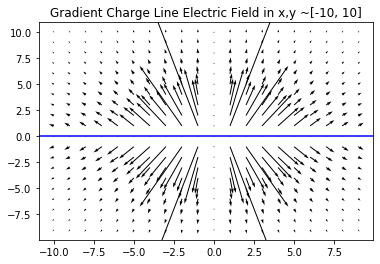

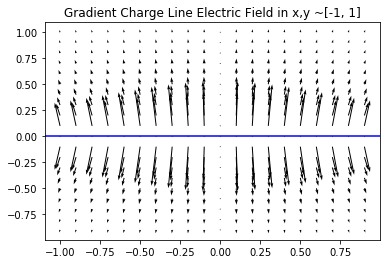

In [9]:
def timeThis(x):
    times = []
    for i in range(x):
        x=random.random()
        y=random.random()
        time1 = float(time.time())
        generateData(x,y)
        time2=time.time()
        times.append(time2-time1)
    print(sum(times))

#make 2d arrays for x,y,u, and v. I believe its only O(kn^2) timewise.
def data_density(density, xlimits, ylimits):
    fig, ax = plt.subplots()
    #create a 2d array of x values and y calues
    X  = np.arange(xlimits[0],xlimits[1],float(density))
    Y  = np.arange(ylimits[1],ylimits[0],float(-density))
    Xs = np.array([X for i in X])
    Ys = np.array([np.array([x]*len(Y)) for x in Y])
    #create an empty 2d array for both U and V
    U, V  = np.array([[0.0]*len(Xs[0])]*len(Xs)) , np.array([[0.0]*len(Ys[0])]*len(Ys))
    #fill said arrays, but at x or y ~ 0, add a zer vector. I'm limiting the accuracy with the 
    #changing into integers before evaluating, but otherwise it just produces a very low
    #(machine epsilon?) value instead of z. Accuracy up to 100ths
    for i in range(len(Xs)):
        for p in range(len(Xs[i])):
            if int(Ys[i][p]*100) == 0 or int(Xs[i][p]*100) == 0:
                U[i][p], V[i][p] = 0,0
            else:
                U[i][p], V[i][p] = generateData(Xs[i][p],Ys[i][p])
    #plot and title
    plt.title("Gradient Charge Line Electric Field in x,y ~[{}, {}]".format(xlimits[0],xlimits[1]))
    ax.quiver(X, Y, U, V)
    #set a line on the x axis as the "line of charge"
    plt.axhline(0,color = 'blue')
    
    
data_density(1,(-10,10),(-10,10))
data_density(0.1,(-1,1),(-1,1))

#finds the time to make a graph that is sqrt(n) points by sqrt(n) points 
#timeThis(10000)

The $[-10, 10]$ plot worked pretty well, and so did the plot from -1 to 1. From far away, the plot looks very similar to one point producing this field, though a bit oblong. From close in, it seems very similar to an infinite line of equal charge.

I checked if the x or y coordinate were zero, and forced the fields there to be zero to avoid  divergant integrands. I had to effectively round the values at zero to check if they were zero, limiting the accuracy of this at very fine resolution. I beleve the values I was getting were machine epsilon, they were definately an insignificant error.  

## Integration via Monte Carlo

### The Function

<font color = blue>
Construct a function that implements the Monte Carlo method of integration.  It should take as inputs the function $F$, the upper and lower limits of integration ($x_0$, $x_f$), the number of "darts" to be thrown $N$, and the height of the box $h$.

In [10]:
def montenegoCravitz(func,limits,N,h):
    xRange=limits[1]-limits[0]
    boxArea=h*xRange
    hits=np.array([])
    for i in range(N):
        #make a random coordinate within the range of x, must be on or above x axis because of the value of h
        randx = random.random() * xRange + limits[0]
        randy = random.random() * h
        #if the toss is a hit, drop the y coord add it to the hit list (although they aren't the ones we're killing)
        if randy <= func(randx):
            hits = np.append(hits,randx)
    return boxArea*(len(hits)/N)


def xSquaredOverTwo(x):
    return (x**2)/2


for i in [10**n for n in range(2,6)]:
    listOfTen = []
    for q in range(10):
        listOfTen.append( montenegoCravitz(xSquaredOverTwo,(-1,3),i,4) )
    print(listOfTen)

[3.68, 3.68, 4.48, 4.32, 5.12, 3.68, 4.96, 4.16, 4.16, 4.16]
[4.992, 4.464, 4.4, 4.56, 4.56, 4.224, 4.752, 4.896, 4.688, 4.8]
[4.56, 4.5552, 4.5552, 4.6896, 4.576, 4.5712, 4.5776, 4.6224, 4.5296, 4.5792]
[4.65504, 4.6296, 4.59904, 4.62464, 4.6112, 4.69312, 4.5968, 4.6288, 4.62448, 4.60864]


It approaches 4.66666, and though they are getting more and more consistent, it is still a fairly bad apporximation compared to any other integration method we've tried. To be noted: I did not try n=1,000,000 because it was taking minutes.

### Testing the Function

<font color = blue>
We will be testing the code on the function

$$
f(x) = \frac{x^2}{2}
$$

that we have now used several times, integrating over the familiar range $[-1, 3]$.

Begin by plotting the function over the integration region, and determining what an appropriate choice of "h" should be.

Now, because of the use of random numbers, the result of a Monte Carlo method calculation will vary slightly each time it's run.  Create an array of 10 separate outputs for the function, with N = 100.  Then repeat this with N = 1000, N = 10000, N = 100000, and N = 1000000.  (You may want to estimate how long this last one will take before executing it.)

See above

## Basic Rutherford Scattering

<font color = blue>
In Rutherford scattering (non-dimensionalized) we assume we begin with a uniform beam of particles of total radius $B$, all at the same speed $v_0 = 1$.  Each particle in the beam can be described by its impact parameter $b$, which determines at what angle $\Theta$ it will strike the detector:

$$
b = \cot\frac{\Theta}{2}, \hspace{.5in} \Theta = 2\cot^{-1} b
$$

The full beam will generate a distribution of strikes that \emph{should} follow the pattern

$$
N(\Theta) \, d\Theta = \frac{N}{B^2} \frac{\cos\frac{\Theta}{2}}{\sin^3\frac{\Theta}{2}} \, d\Theta = \mbox{number of strikes in the range $[\Theta, \Theta + d\Theta]$}
$$

neat

### The Incoming Beam

<font color = blue>
Create a function that generates a simulation of a uniform beam of particles, with two inputs: the radious of the beam and the total number of particles in the beam.  The output should be a list of impact parameters.  Test your module by creating a histogram of the impact parameters of 100000 particles, where the beam radius is $B = 1$.  (The command "hist" in matplotlib.pyplot is what you're looking for.)

Make a detailed, quantitative argument for what the shape of the histogram \emph{should} be, and compare this with the histogram you obtained.  This argument should incorporate the effects of the "bin size" as well as the total number of particles.  



Hint: consider a thin annulus inside the beam of particles, with some inner radius $r$ and some width $w$.  How many particles do you expect to pass through it?

(array([  11.,   38.,   50.,   80.,   86.,  124.,  117.,  145.,  155.,
         216.,  239.,  237.,  247.,  290.,  303.,  349.,  348.,  360.,
         363.,  385.,  436.,  413.,  445.,  422.,  525.,  545.,  545.,
         556.,  578.,  625.,  633.,  639.,  626.,  614.,  660.,  689.,
         760.,  814.,  763.,  791.,  818.,  833.,  805.,  888.,  913.,
         892.,  953.,  963.,  957.,  990.,  996., 1065., 1079., 1074.,
        1088., 1113., 1084., 1127., 1122., 1166., 1200., 1248., 1262.,
        1271., 1339., 1280., 1284., 1342., 1404., 1414., 1439., 1460.,
        1465., 1449., 1415., 1481., 1541., 1525., 1523., 1550., 1595.,
        1606., 1593., 1685., 1637., 1757., 1839., 1734., 1770., 1827.,
        1781., 1863., 1846., 1828., 1858., 1961., 1865., 2008., 1960.,
        1947.]),
 array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
        0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
        0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29

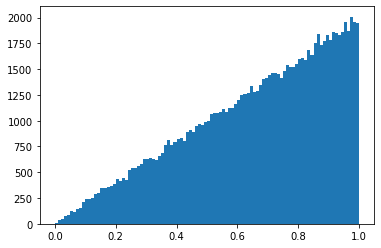

In [11]:
def partical_beam(B,N):
    hits=[0]*N
    count=0
    while count<N:
        #make a random coordinate within the box centered at 0
        randx = (random.random()-0.5) * 2*B
        randy = (random.random()-0.5) * 2*B
        radius= math.sqrt(randy**2 + randx**2)
        #if the toss is a hit, drop the y coord add it to the hit list (although they aren't the ones we're killing)
        if radius <= B:
            hits[count] = radius
            count +=1
    return hits


#Plot that Beam
plt.hist(partical_beam(1,100000), bins = 100,range = (0,1))




This histogram should be expected, except as the number of particles approaces infinity, the triangle will flatten out into a straight edge. If I use smaller data sets, the slope is much more choppy. This is similar to plotting the how far small units of area in a circle are from the center of the circle, producing a triangle with base r and height $\pi * d$, proving $\frac{1}{2}*b*h \; = \frac{1}{2} * r * \pi  d = \pi * r^2$

### * The Outgoing Distribution

<font color = blue>
Now create a function that uses the previous function to generate a list of final angles from a simulated Rutherford experiment.  This function should take the same inputs as the previous function: the radius of the incoming beam and the total number of particles.  Test the function with 100000 incoming particles and an incoming beam radius of $B = 10$, and compare the shape of the histogram with the theoretical shape, including the minimum angle of scattering, and taking into account bin size and total number of particles.  Include in your final plot both the histogram and the theoretical curve.

In [12]:
bin_number=1000

#theoretical function behavoir
def fitFunct(theta,N,B,bin_size):
    return (N/B**2)*bin_size*(math.cos(theta/2))/(math.sin(theta/2)**3)

def imma_firin_my_particle_beam(B,N):
    #take impact parameters from the previous function
    params = partical_beam(B,N)
    min_theta = 2/math.atan(B)
    #calculate an array of the angle associated with those impact parameters
    angle_data = np.array([2/math.atan(i) for i in params])
    bin_size = (max(angle_data)-min_theta)/bin_number
    return angle_data,min_theta,bin_size


#the theoretical. I couldn't get them to line up perfectly, but the shape is definately correct.
def imma_firin_my_theoretical_particle_beam(B,N,bin_size):
    min_theta = 2/math.atan(B)
    bins = np.arange(min_theta,max(data),bin_size)
    ydata=[fitFunct(i,N,B,bin_size) for i in bins]
    return bins,ydata

    
xdata, minTheta, size = imma_firin_my_particle_beam(10,100000)
bins,Thydata = imma_firin_my_theoretical_particle_beam(10,100000,size)
plt.hist(xdata, bin_number, range = (1.2,2))
#plot line at minimum possible angle
plt.axvline(minTheta,color = 'black')




NameError: name 'data' is not defined

This shape is similar to the theoretical curve, and the black line at the beginning is the calculated minimum angle, which has the largest particle count. This is expected, because so few are that close to the actual atom. I'm questioning whether the 2 axis values are correct, however, as I'd guess the equation would produce radians and there's no way the minimum scattering angle is almost $\frac{\pi}{2}$

## Incoming Speed Modification

<font color = blue>
Now we want to modify the "beam" so that the particles in it have a range of speeds (non-dimensionalized) following the Gaussian distribution

$$
\mathcal{P}(v) \, dv = \frac{1}{\sigma\sqrt{2\pi}} \, e^{-\frac{(v - 1)^2}{2\sigma^2}} \, dv
$$

and examine what effect this has on the final distribution of angles.

In [ ]:
#plotting velocity values as produces by the gaussian relationship
def PVpvppvvp(v):
    alpha = 0.1
    return (1/ (alpha*math.sqrt(2*math.pi)) ) * math.exp( -(v - 1)**2/(2*alpha**2))

def velocity_generator(N,alpha):
    #generate the list first to just change indicies later on
    v_vals = np.array([0.0]*N)
    count = 0
    while count < N:     
        pot_v_val = random.random()*2
        pot_Pv_val = random.random()*4
        if pot_Pv_val <= PVpvppvvp(pot_v_val) and pot_v_val > 0:
            v_vals[count] = pot_v_val
            count +=1
    return v_vals

#the theoretical probability curve
plt.plot(np.arange(0,2,0.001),[PVpvppvvp(i)*2000 for i in np.arange(0,2,0.001)])
plt.hist(velocity_generator(100000,0.1), 100, range = (0,2))
        

a satisfying gaussian distribution. The actural function qhile graphed produced the function within the same x bounds, but I just multiplied it by 2000 so it would match the produced data if overlaid. The diffreence is the theoretical distrobution is a probability, whereas the histogram is showing how many darts landed within that area.

### Gaussian Distribution of Speeds

<font color = blue>
Create a function to generate a set of incoming speeds that follow a Gaussian distribution.  Your function should take two inputs: the total number of speeds you want to generate, and the width $\sigma$ of the distribution.  It should also never allow a speed to be generated that is less than zero.  Test your function by generating a list of 100000 particle speeds, using $\sigma = .1$.  Plot the results as a histogram, and confirm that the shape is correct.

### * Modifed Rutherford Distribution

<font color = blue>
Create a function that uses the previous functions for generating impact parameters and speeds to generate a list of final angles.  Test it out using 100000 particles, with a beam radius of 10 and $\sigma = 0.1$.  Show the resulting histogram together with the histogram where we assume all particles have the same speed.

In [ ]:
def final_angle(N,B,alpha):
    velocities = velocity_generator(N,alpha)
    impact_params = partical_beam(B,N)
    angles = np.array([2/math.atan(velocities[d]*impact_params[d]) for d in range(len(impact_params))])
    return angles

#the histogram of using both impact params and speed:
plt.hist(final_angle(100000,10,0.1), bin_number, range = (1.2,2),color = 'red')
    
xdata, minTheta, size = imma_firin_my_particle_beam(10,100000)
plt.hist(xdata, bin_number, range = (1.2,2))
#plot line at minimum possible angle
plt.axvline(minTheta,color = 'black')


This shows a slightly smaller minimum theta, possibly due to varying energies of the incoming particles. Otherwise, they match very well.

## Any Other Problem

<font color = blue>
Come up with a physical problem (different from the ones analyzed above) that yo can use either Simpson's method or a Monte Carlo technique to solve.  Write up a description of the problem below, and then apply the numerical technique to solve it.  Present your results graphically, and discuss their significance.

I'll be diving into how the Simpsons method can be used to approximate the integral pertaining to a laplace transform used to model teh system of a torsion plant. During the analytical method, the Runge-Kutta method of state propagation was used sucessfully, and additionally a system model using laplace transforms created the same thing. With the Runge-Kutta state equations, I should be able to integrate mroe complex systems and model them that way. Overlaid with the actual data, there was error due to things that we could not solve analytically, like quadratic drag. I want to try to add that into the model with this integrationmethod, and try to reduce some error in the model.

The first step will be to remake the model, and find the old data from testing. 


After this, I have to solve the integral of the laplace tranform to put the function into the complex frequency domain, $ F(T) = \int _0 ^\infty e^{-st}*f(t)dt $ with $s\approx j\omega$, solve for the function I'm looking for, and then take a derivative back to the space-time domain.

The total system is one  weighted  disk  at  either  end of a vertical steel rod,  with a motor applying torque to the bottom disk. What is being modeled is the the effect on the second disk of the torque on the first disk, using angular velocity with respect to time. Counts, the unit of the y axis, is how the DAQ system reads angular disaplacement. The graph below is what was produced using Runge-Kutta and Simulink, having determined that the values used in the model were a inertia of the top disk of $0.0022kgm^2$, the top disk as $0.0018kgm^2$, a damping at the top of $0.0062\frac{N m s}{rad}$ and bottom as $0.000428\frac{N m s}{rad}$. The torsional spring constant was measured to be $2.8\frac{N m}{rad}$ These damping constants were due to the disks touching the frame, but not part of the system was damping caused by quadratic drag and initial static friction giving way to kinetic friction. 

Modeling these in a system using laplace transforms would be impossible analytically because the solutions to common Laplace and inverse Laplace transforms are read from a table, and after a certain amount of derrivations it either becomes extremely complex or impossible for that equation to have a simple form. This is a place that algorithmic integration and then differentiation would help make a better model.

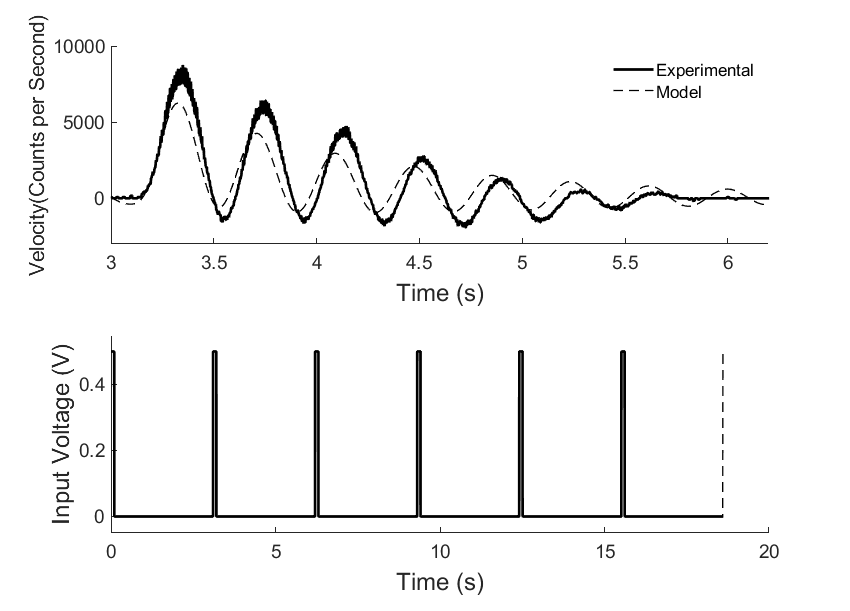 Figure 1: Angular Oscillation of Two Loaded Disks Torsioning Steel Rods, the bottom disk system experiencing a damper constant(the B value above) 14.5 times larger than that of the top disk system, displayed by the lower disk oscillation’s increased rate of decay. The angular displacement was measured in counts, one count equivalent to 1/16000th of a full rotation. The system parameters listed above were calculated experimentally, representing the moments of inertia, spring constants, and damper constants of the top and bottom unloaded disks.